In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_medals = pd.read_csv('data/sim_full_medal_data.csv')
full_medals = full_medals.sort_values(by=['Country Code', 'Year']).reset_index(drop=True).dropna()
full_medals

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,Host Continent,Team Size,Participated Events,Total Events,Total Male Participants,Total Female Participants
0,0,1522,0.0,Afghanistan,0.0,0.0,0.0,0.0,1936,AFG,0,0,0,16.0,4,129.0,15.0,0.0
1,1,1540,0.0,Afghanistan,0.0,0.0,0.0,0.0,1948,AFG,0,0,0,25.0,2,136.0,22.0,0.0
2,2,1584,0.0,Afghanistan,0.0,0.0,0.0,0.0,1956,AFG,0,0,0,12.0,1,151.0,12.0,0.0
3,3,1653,0.0,Afghanistan,0.0,0.0,0.0,0.0,1960,AFG,0,0,0,16.0,13,150.0,12.0,0.0
4,4,1674,0.0,Afghanistan,0.0,0.0,0.0,0.0,1964,AFG,0,0,1,8.0,8,163.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,3402,1026,38.0,Zimbabwe,1.0,3.0,0.0,4.0,2008,ZIM,0,0,0,16.0,15,302.0,8.0,5.0
3403,3403,2814,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2012,ZIM,0,0,0,9.0,8,302.0,4.0,3.0
3404,3404,2916,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2016,ZIM,0,0,0,31.0,13,306.0,9.0,21.0
3405,3405,3079,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2020,ZIM,0,0,0,5.0,5,339.0,4.0,1.0


In [3]:
full_medals.loc[:, 'Possible Gold'] = full_medals.groupby('Year')['Gold'].transform('sum')
full_medals.loc[:, 'Possible Silver'] = full_medals.groupby('Year')['Silver'].transform('sum')
full_medals.loc[:, 'Possible Bronze'] = full_medals.groupby('Year')['Bronze'].transform('sum')

full_medals.loc[:, '% Female'] = full_medals.loc[:, 'Total Female Participants'] / (full_medals.loc[:, 'Total Female Participants'] + full_medals.loc[:, 'Total Male Participants'])

full_medals

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,...,Host Continent,Team Size,Participated Events,Total Events,Total Male Participants,Total Female Participants,Possible Gold,Possible Silver,Possible Bronze,% Female
0,0,1522,0.0,Afghanistan,0.0,0.0,0.0,0.0,1936,AFG,...,0,16.0,4,129.0,15.0,0.0,141.0,140.0,141.0,0.000000
1,1,1540,0.0,Afghanistan,0.0,0.0,0.0,0.0,1948,AFG,...,0,25.0,2,136.0,22.0,0.0,138.0,135.0,138.0,0.000000
2,2,1584,0.0,Afghanistan,0.0,0.0,0.0,0.0,1956,AFG,...,0,12.0,1,151.0,12.0,0.0,153.0,153.0,163.0,0.000000
3,3,1653,0.0,Afghanistan,0.0,0.0,0.0,0.0,1960,AFG,...,0,16.0,13,150.0,12.0,0.0,152.0,149.0,160.0,0.000000
4,4,1674,0.0,Afghanistan,0.0,0.0,0.0,0.0,1964,AFG,...,1,8.0,8,163.0,8.0,0.0,163.0,167.0,174.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,3402,1026,38.0,Zimbabwe,1.0,3.0,0.0,4.0,2008,ZIM,...,0,16.0,15,302.0,8.0,5.0,302.0,303.0,353.0,0.384615
3403,3403,2814,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2012,ZIM,...,0,9.0,8,302.0,4.0,3.0,303.0,305.0,352.0,0.428571
3404,3404,2916,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2016,ZIM,...,0,31.0,13,306.0,9.0,21.0,306.0,307.0,359.0,0.700000
3405,3405,3079,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2020,ZIM,...,0,5.0,5,339.0,4.0,1.0,340.0,338.0,402.0,0.200000


In [4]:
def country_medals(country):
    medals = full_medals.where(full_medals['Country Code'] == country).dropna().sort_values(by="Year")
    return medals

rows = []
countries = full_medals['Country Code'].unique()

n = 2

for i in range(1, n+1):
    full_medals.loc[:, f'Gold - {i}'] = full_medals.groupby('Country Code')['Gold'].shift(periods=i)
    full_medals.loc[:, f'Silver - {i}'] = full_medals.groupby('Country Code')['Silver'].shift(periods=i)
    full_medals.loc[:, f'Bronze - {i}'] = full_medals.groupby('Country Code')['Bronze'].shift(periods=i)

    full_medals.loc[:, f'Team Size - {i}'] = full_medals.groupby('Country Code')['Team Size'].shift(periods=1)    

# full_medals.loc[:, f'Team Size - 1'] = full_medals.groupby('Country Code')['Team Size'].shift(periods=1)

full_medals = full_medals.fillna(0)
full_medals

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,...,Possible Bronze,% Female,Gold - 1,Silver - 1,Bronze - 1,Team Size - 1,Gold - 2,Silver - 2,Bronze - 2,Team Size - 2
0,0,1522,0.0,Afghanistan,0.0,0.0,0.0,0.0,1936,AFG,...,141.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1540,0.0,Afghanistan,0.0,0.0,0.0,0.0,1948,AFG,...,138.0,0.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
2,2,1584,0.0,Afghanistan,0.0,0.0,0.0,0.0,1956,AFG,...,163.0,0.000000,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0
3,3,1653,0.0,Afghanistan,0.0,0.0,0.0,0.0,1960,AFG,...,160.0,0.000000,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0
4,4,1674,0.0,Afghanistan,0.0,0.0,0.0,0.0,1964,AFG,...,174.0,0.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,3402,1026,38.0,Zimbabwe,1.0,3.0,0.0,4.0,2008,ZIM,...,353.0,0.384615,1.0,1.0,1.0,14.0,0.0,0.0,0.0,14.0
3403,3403,2814,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2012,ZIM,...,352.0,0.428571,1.0,3.0,0.0,16.0,1.0,1.0,1.0,16.0
3404,3404,2916,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2016,ZIM,...,359.0,0.700000,0.0,0.0,0.0,9.0,1.0,3.0,0.0,9.0
3405,3405,3079,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2020,ZIM,...,402.0,0.200000,0.0,0.0,0.0,31.0,0.0,0.0,0.0,31.0


<Axes: >

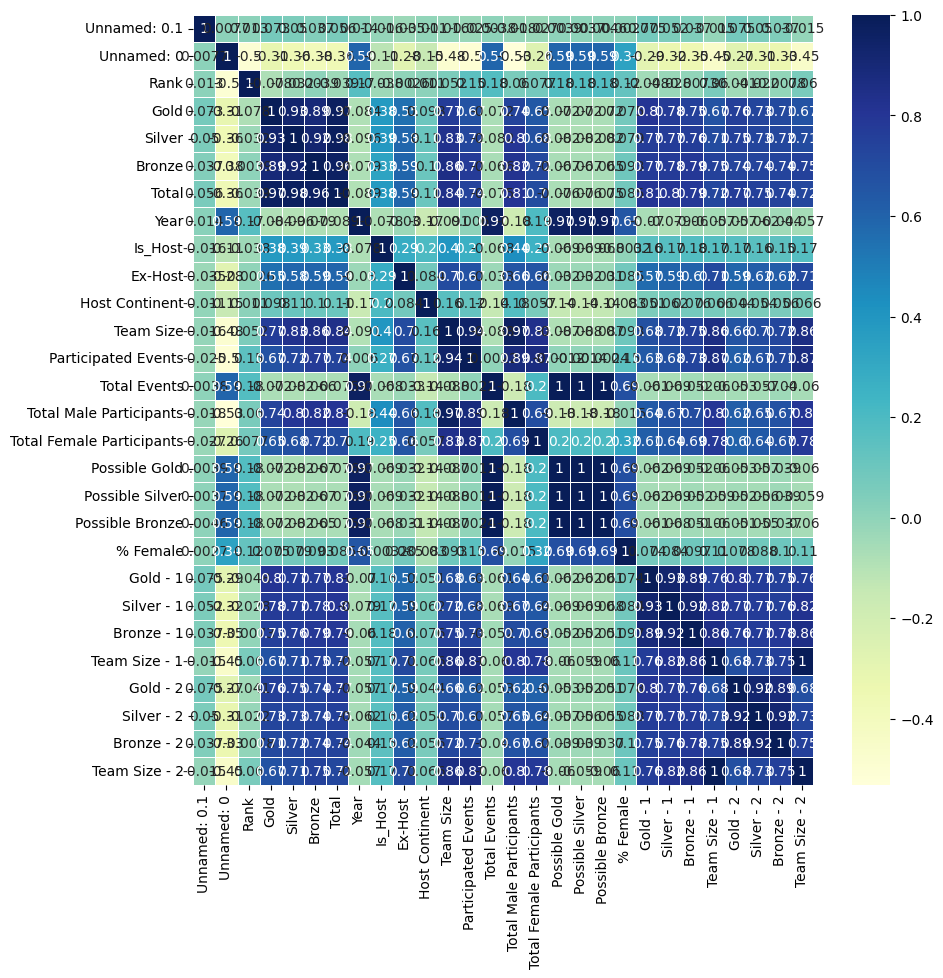

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(full_medals.corr(numeric_only=True), cmap="YlGnBu", linewidths=.5, annot=True, ax=ax)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = full_medals[['Gold - 1', 'Gold - 2', 'Silver - 1', 'Silver - 2', 'Bronze - 1', 'Bronze - 2', 'Ex-Host', 'Team Size', 'Participated Events', '% Female', 'Year', 'Possible Gold', 'Possible Silver', 'Possible Bronze', 'Gold', 'Silver', 'Bronze']]

train = data[data['Year'] <= 2012]
test = data[data['Year'] > 2012]

X_train = train.iloc[:, :-7]
y_train = train.iloc[:, -7:]
X_test = test.iloc[:, :-7]
y_test = test.iloc[:, -7:]


truth_counts_train = y_train.iloc[:, :]
y_train = y_train.iloc[:, 4:]
truth_counts_test = y_test.iloc[:, :]
y_test = y_test.iloc[:, 4:]

In [7]:
# def fit(estimator, classifier, X, y):
#     nonzero_indices = y.any(axis=1)
#     classifier.fit(X, nonzero_indices)
#     estimator.fit(X[nonzero_indices], y[nonzero_indices])

# def predict(estimator, classifier, X):
#     y = np.zeros(shape=(X.shape[0], 3))

#     nonzero_indices = classifier.predict(X)
#     y[nonzero_indices] = estimator.predict(X[nonzero_indices])

#     return y

In [8]:
def fit(estimator, classifier, X, y):
    # nonzero_indices = y.any(axis=1)
    # classifier.fit(X, nonzero_indices)
    # estimator.fit(X[nonzero_indices], y[nonzero_indices])
    estimator.fit(X, y)

def predict(estimator, classifier, X):
    y = estimator.predict(X)

    return y

In [23]:
def scale_predictions(predictions, possible_counts):
    predictions = pd.DataFrame(predictions, columns=[['Gold', 'Silver', 'Bronze']])
    possible_counts = possible_counts.reset_index(drop=True)

    possible_counts[['Predicted Gold', 'Predicted Silver', 'Predicted Bronze']] = predictions[['Gold', 'Silver', 'Bronze']]

    possible_counts['Corrected Gold'] = ((possible_counts['Predicted Gold'] / possible_counts.groupby('Year')['Predicted Gold'].transform('sum')) * possible_counts['Possible Gold']).astype(int)
    possible_counts['Corrected Silver'] = ((possible_counts['Predicted Silver'] / possible_counts.groupby('Year')['Predicted Silver'].transform('sum')) * possible_counts['Possible Silver']).astype(int)
    possible_counts['Corrected Bronze'] = ((possible_counts['Predicted Bronze'] / possible_counts.groupby('Year')['Predicted Bronze'].transform('sum')) * possible_counts['Possible Bronze']).astype(int)

    return possible_counts[['Gold', 'Silver', 'Bronze', 'Corrected Gold', 'Corrected Silver', 'Corrected Bronze']]

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, ElasticNetCV, Perceptron, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.svm import SVC

reg = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
cls = SVC()
fit(reg, cls, X_train, y_train)
y_pred = predict(reg, cls, X_test)
predictions = scale_predictions(y_pred, truth_counts_test)
print(mean_absolute_error(predictions['Gold']+predictions['Silver']+predictions['Bronze'], predictions['Corrected Gold']+predictions['Corrected Silver']+predictions['Corrected Bronze']))
predictions

4.208333333333333


,Gold,Silver,Bronze,Corrected Gold,Corrected Silver,Corrected Bronze
0,3.0,3.0,1.0,0,1,1
1,3.0,1.0,0.0,1,0,1
2,2.0,0.0,0.0,-1,-1,-1
3,0.0,3.0,1.0,1,1,1
4,1.0,2.0,1.0,0,0,0
...,...,...,...,...,...,...
115,44.0,36.0,30.0,62,56,45
116,0.0,0.0,0.0,0,0,0
117,1.0,1.0,3.0,0,0,0
118,0.0,0.0,0.0,0,0,0


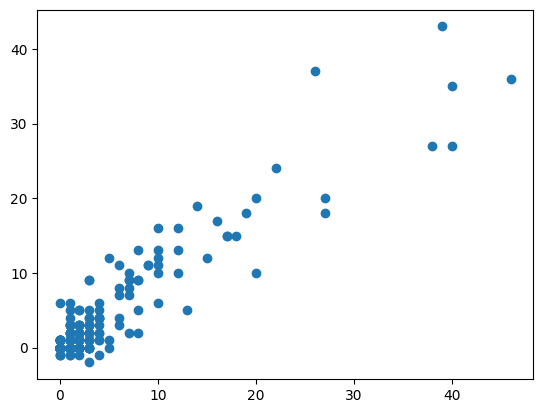

In [12]:
plt.scatter(predictions['Gold'], predictions['Corrected Gold'])

In [13]:
from sklearn.metrics import mean_absolute_error
print("Gold:", mean_absolute_error(predictions['Gold'], predictions['Corrected Gold']))
print("Silver:", mean_absolute_error(predictions['Silver'], predictions['Corrected Silver']))
print("Bronze:", mean_absolute_error(predictions['Bronze'], predictions['Corrected Bronze']))

Gold: 0.6752827140549273
Silver: 0.7948303715670436
Bronze: 0.7883683360258481


In [14]:
from sklearn.svm import SVC

# cls = SVC().fit(X_train, ~y_train.any(axis=1).to_numpy())
reg = MultiOutputRegressor(Lasso(alpha=0.1, random_state=0)).fit(X_train[y_train.any(axis=1)], y_train[y_train.any(axis=1)])
# print(cls.score(X_train, ~y_train.any(axis=1).to_numpy()))
print(reg.score(X_train[y_train.any(axis=1)], y_train[y_train.any(axis=1)].to_numpy()))

0.7620754257178158


Test: 2.7592338319575695


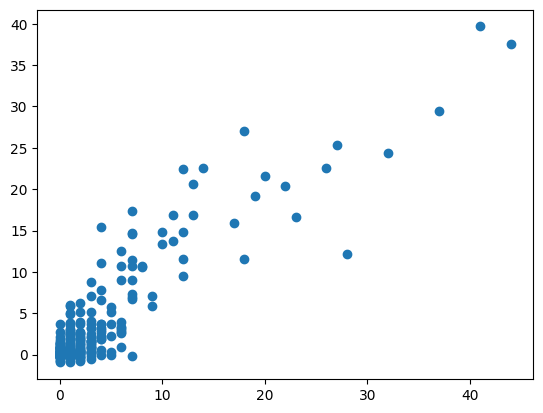

In [15]:
y_pred = reg.predict(X_test[y_test.any(axis=1)])

print("Test:", root_mean_squared_error(y_test[y_test.any(axis=1)].to_numpy(), y_pred))

plt.scatter(y_test[y_test.any(axis=1)].to_numpy()[:, 1], y_pred[:, 1])

In [16]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [1172]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(3)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [1173]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 4])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)



In [1174]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [1175]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_45                │ (2583, 11)             │            23 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [1176]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=50)

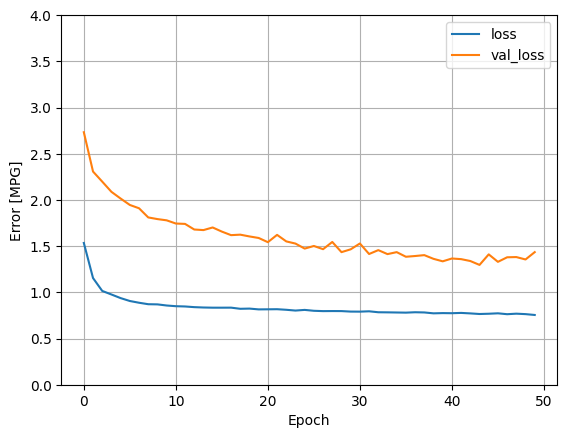

In [1177]:
plot_loss(history)

In [1178]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)
display(test_results)
pd.DataFrame(test_results, index=['Mean absolute error']).T

{'dnn_model': 0.7490661144256592}

,Mean absolute error
dnn_model,0.749066


In [1179]:
print("Train:", root_mean_squared_error(y_train, dnn_model.predict(X_train)))
print("Test:", root_mean_squared_error(y_test, dnn_model.predict(X_test)))

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
Train: 2.778061866760254
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
Test: 2.0598528385162354


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


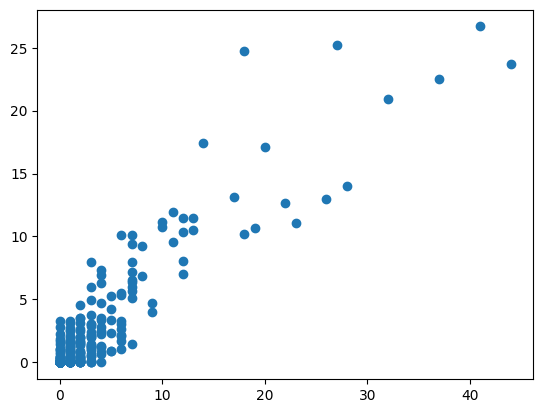

In [1181]:
y_pred = dnn_model.predict(X_test)
plt.scatter(y_test.to_numpy()[:, 1], y_pred[:, 1])

In [18]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, ElasticNetCV, Perceptron, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVC


years = list(full_medals['Year'].unique())
n_folds = 7

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

folds = list(split(years, n_folds))
model_errors = {
    'RandomForestRegressor': 0,
    'ElasticNet': 0,
    'ElasticNetCV': 0,
    'GradientBoostingRegressor': 0,
    'LinearRegression': 0,
    'Ridge': 0,
    'Lasso': 0,
    'DNN': 0
}
for fold in folds:
    print(f'Running fold {fold}')
    data = full_medals[['Gold - 1', 'Gold - 2', 'Silver - 1', 'Silver - 2', 'Bronze - 1', 'Bronze - 2', 'Ex-Host', 'Team Size', 'Participated Events', 'Team Size - 1', 'Team Size - 2', '% Female', 'Year', 'Possible Gold', 'Possible Silver', 'Possible Bronze', 'Gold', 'Silver', 'Bronze']]
    train = data[~data['Year'].isin(fold)]
    test = data[data['Year'].isin(fold)]

    X_train = train.iloc[:, :-7]
    y_train = train.iloc[:, -7:]
    X_test = test.iloc[:, :-7]
    y_test = test.iloc[:, -7:]
    
    
    truth_counts_train = y_train.iloc[:, :]
    y_train = y_train.iloc[:, 4:]
    truth_counts_test = y_test.iloc[:, :]
    y_test = y_test.iloc[:, 4:]

    reg = MultiOutputRegressor(LinearRegression())
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['LinearRegression'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())
    # model_errors['LinearRegression'] += mean_absolute_error(y_test, y_pred)

    reg = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, max_depth=30, random_state=0))
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['RandomForestRegressor'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

    reg = MultiOutputRegressor(ElasticNet(random_state=0))
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['ElasticNet'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

    reg = MultiOutputRegressor(ElasticNetCV(random_state=0))
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['ElasticNetCV'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

    reg = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['GradientBoostingRegressor'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

    reg = MultiOutputRegressor(Ridge(random_state=0))
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['Ridge'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

    reg = MultiOutputRegressor(Lasso(random_state=0))
    cls = LogisticRegression()
    fit(reg, cls, X_train, y_train)
    y_pred = predict(reg, cls, X_test)
    predictions = scale_predictions(y_pred, truth_counts_test)
    model_errors['Lasso'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

    # normalizer = tf.keras.layers.Normalization(axis=-1)
    # normalizer.adapt(np.array(X_train))
    # dnn_model = build_and_compile_model(normalizer)
    # dnn_model.fit(
    # X_train,
    # y_train,
    # validation_split=0.2,
    # verbose=0, epochs=50)
    # y_pred = dnn_model.predict(X_test)
    # predictions = scale_predictions(y_pred, truth_counts_test)
    # model_errors['DNN'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())
    

for key in model_errors:
    model_errors[key] /= n_folds

display(model_errors)

Running fold [1936, 1948, 1956, 1960, 1964]
Running fold [1968, 1972, 1980, 1988, 1996]
Running fold [2004, 2008, 2012, 2016]
Running fold [2020, 2024, 1952, 1976]
Running fold [1984, 1992, 2000, 1908]
Running fold [1912, 1900, 1920, 1924]
Running fold [1928, 1932, 1896, 1904]


{'RandomForestRegressor': 2.4742152455545394,
 'ElasticNet': 2.414149504825628,
 'ElasticNetCV': 2.4162743786272247,
 'GradientBoostingRegressor': 2.5183286358385586,
 'LinearRegression': 2.460149387199673,
 'Ridge': 2.4599019673113665,
 'Lasso': 2.431921143301832,
 'DNN': 0.0}

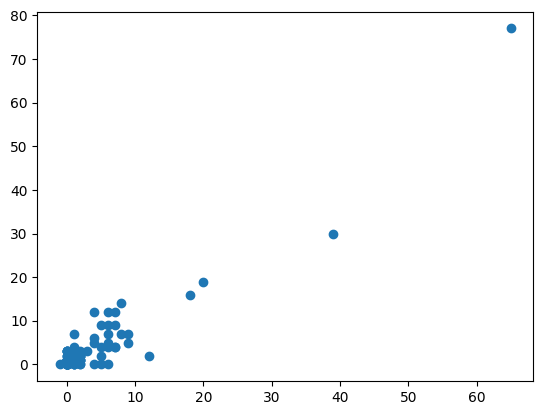

In [19]:
plt.scatter(predictions['Corrected Bronze'], predictions['Bronze'])

In [1391]:
data = full_medals[['Gold - 1', 'Gold - 2', 'Silver - 1', 'Silver - 2', 'Bronze - 1', 'Bronze - 2', 'Ex-Host', 'Team Size', 'Participated Events', 'Team Size - 1', 'Team Size - 2', '% Female', 'Year', 'Possible Gold', 'Possible Silver', 'Possible Bronze', 'Gold', 'Silver', 'Bronze']]

train = data[data['Year'] <= 2012]
test = data[data['Year'] > 2012]

X_train = train.iloc[:, :-7]
y_train = train.iloc[:, -7:]
X_test = test.iloc[:, :-7]
y_test = test.iloc[:, -7:]

truth_counts_train = y_train.iloc[:, :]
y_train = y_train.iloc[:, 4:]
truth_counts_test = y_test.iloc[:, :]
y_test = y_test.iloc[:, 4:]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
dnn_model = build_and_compile_model(normalizer)
dnn_model.fit(
X_train,
y_train,
validation_split=0.2,
verbose=0, epochs=50)
y_pred = dnn_model.predict(X_test)
predictions = scale_predictions(y_pred, truth_counts_test)
model_errors['DNN'] += root_mean_squared_error(predictions[['Gold', 'Silver', 'Bronze']].to_numpy(), predictions[['Corrected Gold', 'Corrected Silver', 'Corrected Bronze']].to_numpy())

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


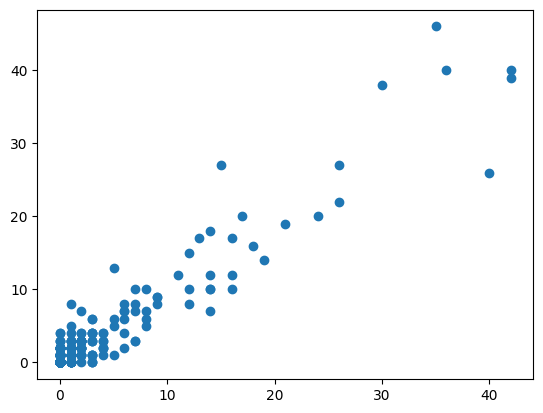

In [1398]:
plt.scatter(predictions['Corrected Gold'], predictions['Gold'])

In [47]:
sim_data = pd.read_csv('data/sim_full_medal_data.csv').sort_values(by=['Country Code', 'Year']).reset_index(drop=True)
sim_data[sim_data['Country Code'] == 'RUS']

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,Host Continent,Team Size,Participated Events,Total Events,Total Male Participants,Total Female Participants
2655,2655,1437,0.0,Russian Empire,0.0,0.0,0.0,0.0,1900,RUS,0,0,1,5.0,3,97.0,4.0,0.0
2656,2656,53,12.0,Russian Empire,1.0,2.0,0.0,3.0,1908,RUS,0,0,0,7.0,7,110.0,6.0,0.0
2657,2657,76,16.0,Russian Empire,0.0,2.0,3.0,5.0,1912,RUS,0,0,1,266.0,62,102.0,160.0,0.0
2658,2658,1486,0.0,Russian Empire,0.0,0.0,0.0,0.0,1924,RUS,0,0,1,3.0,2,126.0,2.0,1.0
2659,2659,757,2.0,Russia,26.0,21.0,16.0,63.0,1996,RUS,0,0,0,552.0,212,271.0,232.0,158.0
2660,2660,836,2.0,Russia,32.0,28.0,29.0,89.0,2000,RUS,0,0,0,602.0,238,300.0,241.0,194.0
2661,2661,917,3.0,Russia,28.0,26.0,36.0,90.0,2004,RUS,0,0,1,593.0,235,301.0,244.0,202.0
2662,2662,991,3.0,Russia,24.0,13.0,23.0,60.0,2008,RUS,0,0,0,600.0,242,302.0,231.0,223.0
2663,2663,1079,4.0,Russia,18.0,21.0,26.0,65.0,2012,RUS,0,0,0,549.0,238,302.0,203.0,225.0
2664,2664,1165,4.0,Russia,19.0,17.0,20.0,56.0,2016,RUS,0,0,0,406.0,181,306.0,142.0,142.0


In [48]:
sim_data.loc[:, 'Possible Gold'] = sim_data.loc[:, 'Total Events']
sim_data.loc[:, 'Possible Silver'] = sim_data.loc[:, 'Total Events']
sim_data.loc[:, 'Possible Bronze'] = sim_data.loc[:, 'Total Events']
sim_data.loc[:, '% Female'] = sim_data.loc[:, 'Total Female Participants'] / (sim_data.loc[:, 'Total Female Participants'] + sim_data.loc[:, 'Total Male Participants'])
sim_data

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,...,Host Continent,Team Size,Participated Events,Total Events,Total Male Participants,Total Female Participants,Possible Gold,Possible Silver,Possible Bronze,% Female
0,0,1522,0.0,Afghanistan,0.0,0.0,0.0,0.0,1936,AFG,...,0,16.0,4,129.0,15.0,0.0,129.0,129.0,129.0,0.000000
1,1,1540,0.0,Afghanistan,0.0,0.0,0.0,0.0,1948,AFG,...,0,25.0,2,136.0,22.0,0.0,136.0,136.0,136.0,0.000000
2,2,1584,0.0,Afghanistan,0.0,0.0,0.0,0.0,1956,AFG,...,0,12.0,1,151.0,12.0,0.0,151.0,151.0,151.0,0.000000
3,3,1653,0.0,Afghanistan,0.0,0.0,0.0,0.0,1960,AFG,...,0,16.0,13,150.0,12.0,0.0,150.0,150.0,150.0,0.000000
4,4,1674,0.0,Afghanistan,0.0,0.0,0.0,0.0,1964,AFG,...,1,8.0,8,163.0,8.0,0.0,163.0,163.0,163.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,3403,2814,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2012,ZIM,...,0,9.0,8,302.0,4.0,3.0,302.0,302.0,302.0,0.428571
3404,3404,2916,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2016,ZIM,...,0,31.0,13,306.0,9.0,21.0,306.0,306.0,306.0,0.700000
3405,3405,3079,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2020,ZIM,...,0,5.0,5,339.0,4.0,1.0,339.0,339.0,339.0,0.200000
3406,3406,3149,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2024,ZIM,...,0,7.0,6,329.0,5.0,2.0,329.0,329.0,329.0,0.285714


In [49]:
n = 2

for i in range(1, n+1):
    sim_data.loc[:, f'Gold - {i}'] = sim_data.groupby('Country Code')['Gold'].shift(periods=i)
    sim_data.loc[:, f'Silver - {i}'] = sim_data.groupby('Country Code')['Silver'].shift(periods=i)
    sim_data.loc[:, f'Bronze - {i}'] = sim_data.groupby('Country Code')['Bronze'].shift(periods=i)

    sim_data.loc[:, f'Team Size - {i}'] = sim_data.groupby('Country Code')['Team Size'].shift(periods=1)    

# full_medals.loc[:, f'Team Size - 1'] = full_medals.groupby('Country Code')['Team Size'].shift(periods=1)

sim_data = sim_data.fillna(0)
sim_data

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,...,Possible Bronze,% Female,Gold - 1,Silver - 1,Bronze - 1,Team Size - 1,Gold - 2,Silver - 2,Bronze - 2,Team Size - 2
0,0,1522,0.0,Afghanistan,0.0,0.0,0.0,0.0,1936,AFG,...,129.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1540,0.0,Afghanistan,0.0,0.0,0.0,0.0,1948,AFG,...,136.0,0.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
2,2,1584,0.0,Afghanistan,0.0,0.0,0.0,0.0,1956,AFG,...,151.0,0.000000,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0
3,3,1653,0.0,Afghanistan,0.0,0.0,0.0,0.0,1960,AFG,...,150.0,0.000000,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0
4,4,1674,0.0,Afghanistan,0.0,0.0,0.0,0.0,1964,AFG,...,163.0,0.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,3403,2814,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2012,ZIM,...,302.0,0.428571,1.0,3.0,0.0,16.0,1.0,1.0,1.0,16.0
3404,3404,2916,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2016,ZIM,...,306.0,0.700000,0.0,0.0,0.0,9.0,1.0,3.0,0.0,9.0
3405,3405,3079,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2020,ZIM,...,339.0,0.200000,0.0,0.0,0.0,31.0,0.0,0.0,0.0,31.0
3406,3406,3149,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2024,ZIM,...,329.0,0.285714,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0


In [50]:
data = sim_data[['Gold - 1', 'Gold - 2', 'Silver - 1', 'Silver - 2', 'Bronze - 1', 'Bronze - 2', 'Ex-Host', 'Team Size', 'Participated Events', '% Female', 'Year', 'Possible Gold', 'Possible Silver', 'Possible Bronze', 'Gold', 'Silver', 'Bronze']]

train = data[data['Year'] <= 2024]
test = data[data['Year'] >= 2028]


X_train = train.iloc[:, :-7]
y_train = train.iloc[:, -7:]
y_train = y_train.iloc[:, 4:]

X_test = test.iloc[:, :-7]

reg = MultiOutputRegressor(Lasso(random_state=0)).fit(X_train, y_train)

y_pred = reg.predict(X_test)
predictions = pd.DataFrame(y_pred, columns=[['Gold', 'Silver', 'Bronze']])

test.loc[:, 'Gold'] = predictions.loc[:, 'Gold'].values
test.loc[:, 'Silver'] = predictions.loc[:, 'Silver'].values
test.loc[:, 'Bronze'] = predictions.loc[:, 'Bronze'].values

test['Gold'] = ((test['Gold'] / test.groupby('Year')['Gold'].transform('sum')) * test['Possible Gold']).astype(int)
test['Silver'] = ((test['Silver'] / test.groupby('Year')['Silver'].transform('sum')) * test['Possible Silver']).astype(int)
test['Bronze'] = ((test['Bronze'] / test.groupby('Year')['Bronze'].transform('sum')) * test['Possible Bronze']).astype(int)
test['Total'] = test[['Gold', 'Silver', 'Bronze']].sum(axis=1)
test['Rank'] = test['Total'].rank(ascending = False)

display(test)

# return possible_counts[['Gold', 'Silver', 'Bronze', 'Corrected Gold', 'Corrected Silver', 'Corrected Bronze']]
# predictions = scale_predictions(y_pred, truth_counts_test)

/var/folders/5c/216t7l5x1_j3zsn2fm8z7s180000gn/T/ipykernel_71719/3084394975.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Gold'] = ((test['Gold'] / test.groupby('Year')['Gold'].transform('sum')) * test['Possible Gold']).astype(int)
/var/folders/5c/216t7l5x1_j3zsn2fm8z7s180000gn/T/ipykernel_71719/3084394975.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Silver'] = ((test['Silver'] / test.groupby('Year')['Silver'].transform('sum')) * test['Possible Silver']).astype(int)
/var/folders/5

,Gold - 1,Gold - 2,Silver - 1,Silver - 2,Bronze - 1,Bronze - 2,Ex-Host,Team Size,Participated Events,% Female,Year,Possible Gold,Possible Silver,Possible Bronze,Gold,Silver,Bronze,Total,Rank
16,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5,0.400000,2028,334.0,334.0,334.0,0,0,0,0,128.5
31,0.0,0.0,0.0,0.0,0.0,0.0,0,46.0,30,0.531250,2028,329.0,329.0,329.0,0,0,0,0,128.5
42,0.0,0.0,0.0,0.0,2.0,0.0,0,9.0,9,0.375000,2028,334.0,334.0,334.0,0,0,0,0,128.5
58,2.0,0.0,0.0,0.0,1.0,0.0,0,50.0,45,0.372093,2028,334.0,334.0,334.0,0,0,0,0,128.5
72,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,0.500000,2028,334.0,334.0,334.0,0,0,0,0,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,20,0.647059,2028,334.0,334.0,334.0,0,0,0,0,128.5
3339,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,3,0.666667,2028,334.0,334.0,334.0,0,0,0,0,128.5
3358,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,5,0.250000,2028,334.0,334.0,334.0,0,0,0,0,128.5
3391,0.0,0.0,0.0,0.0,1.0,0.0,0,31.0,9,0.766667,2028,334.0,334.0,334.0,0,0,0,0,128.5


In [51]:
sim_data.loc[test.index.values, ['Gold', 'Silver', 'Bronze', 'Total', 'Rank']] = test.loc[:, ['Gold', 'Silver', 'Bronze', 'Total', 'Rank']]
sim_data

,Unnamed: 0.1,Unnamed: 0,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,...,Possible Bronze,% Female,Gold - 1,Silver - 1,Bronze - 1,Team Size - 1,Gold - 2,Silver - 2,Bronze - 2,Team Size - 2
0,0,1522,0.0,Afghanistan,0.0,0.0,0.0,0.0,1936,AFG,...,129.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1540,0.0,Afghanistan,0.0,0.0,0.0,0.0,1948,AFG,...,136.0,0.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
2,2,1584,0.0,Afghanistan,0.0,0.0,0.0,0.0,1956,AFG,...,151.0,0.000000,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0
3,3,1653,0.0,Afghanistan,0.0,0.0,0.0,0.0,1960,AFG,...,150.0,0.000000,0.0,0.0,0.0,12.0,0.0,0.0,0.0,12.0
4,4,1674,0.0,Afghanistan,0.0,0.0,0.0,0.0,1964,AFG,...,163.0,0.000000,0.0,0.0,0.0,16.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,3403,2814,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2012,ZIM,...,302.0,0.428571,1.0,3.0,0.0,16.0,1.0,1.0,1.0,16.0
3404,3404,2916,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2016,ZIM,...,306.0,0.700000,0.0,0.0,0.0,9.0,1.0,3.0,0.0,9.0
3405,3405,3079,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2020,ZIM,...,339.0,0.200000,0.0,0.0,0.0,31.0,0.0,0.0,0.0,31.0
3406,3406,3149,0.0,Zimbabwe,0.0,0.0,0.0,0.0,2024,ZIM,...,329.0,0.285714,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0


,Year,Gold,Silver,Bronze,Total,Is_Host,Ex-Host,Host Continent,Team Size,Possible Bronze,Possible Silver,Possible Bronze
2815,1912,0.0,0.0,0.0,0.0,0,0,1,2.0,102.0,102.0,102.0
2816,2008,0.0,1.0,2.0,3.0,0,0,0,97.0,302.0,302.0,302.0
2817,2012,1.0,1.0,2.0,4.0,0,0,0,134.0,302.0,302.0,302.0
2818,2016,2.0,4.0,2.0,8.0,0,0,0,127.0,306.0,306.0,306.0
2819,2020,3.0,1.0,5.0,9.0,0,0,0,110.0,339.0,339.0,339.0
2820,2024,3.0,1.0,1.0,5.0,0,0,1,135.0,329.0,329.0,329.0
2821,2028,3.0,3.0,3.0,9.0,0,0,0,122.0,334.0,334.0,334.0


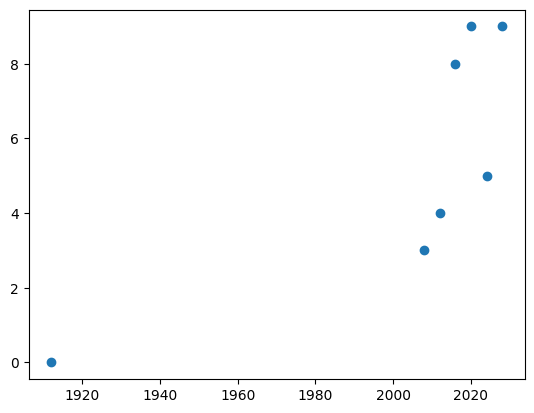

In [96]:
display(sim_data[sim_data['NOC'] == 'Serbia'].loc[:, ['Year', 'Gold', 'Silver', 'Bronze', 'Total', 'Is_Host', 'Ex-Host', 'Host Continent', 'Team Size', 'Possible Bronze', 'Possible Silver', 'Possible Bronze']])
plt.scatter(sim_data[sim_data['NOC'] == 'Serbia']['Year'], sim_data[sim_data['NOC'] == 'Serbia']['Total'])

In [70]:
export = sim_data[['Year', 'Country Code', 'Gold', 'Silver', 'Bronze', 'Total', 'Rank']][sim_data['Year'] == 2028].sort_values('Rank', ascending=True).reset_index(drop=True)
display(export)
export.to_csv('data/projected_medals_2028.csv')

,Year,Country Code,Gold,Silver,Bronze,Total,Rank
0,2028,USA,38.0,33.0,30.0,101.0,1.0
1,2028,CHN,30.0,24.0,22.0,76.0,2.0
2,2028,JPN,25.0,24.0,21.0,70.0,3.0
3,2028,AUS,21.0,20.0,18.0,59.0,4.0
4,2028,FRA,20.0,19.0,18.0,57.0,5.0
...,...,...,...,...,...,...,...
201,2028,HAI,0.0,0.0,0.0,0.0,128.5
202,2028,HON,0.0,0.0,0.0,0.0,128.5
203,2028,INA,0.0,0.0,0.0,0.0,128.5
204,2028,GHA,0.0,0.0,0.0,0.0,128.5


In [98]:
most_improved = sim_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
most_improved = most_improved.sort_values(['Country Code', 'Year'])
most_improved['Difference'] = most_improved.groupby(['Country Code'])['Total'].diff().fillna(0)
most_improved['Cumulative Sum'] = most_improved.groupby(['Country Code'])['Total'].cumsum()
most_improved['Cumulative Sum'] = most_improved.groupby(['Country Code'])['Cumulative Sum'].shift()
most_improved = most_improved.fillna(0)
most_improved['% Difference'] = most_improved['Difference'] / most_improved['Cumulative Sum']

most_improved_raw = most_improved.sort_values(by='Difference', ascending=False).loc[most_improved['Year'] == 2028].reset_index(drop=True)
most_improved_pct = most_improved.sort_values(by='% Difference', ascending=False).loc[most_improved['Year'] == 2028].reset_index(drop=True)

# most_improved.loc[row]

In [110]:
display(most_improved_pct)

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,...,Silver - 1,Bronze - 1,Team Size - 1,Gold - 2,Silver - 2,Bronze - 2,Team Size - 2,Difference,Cumulative Sum,% Difference
0,23.5,Serbia,3.0,3.0,3.0,9.0,2028,SRB,0,0,...,1.0,1.0,135.0,3.0,1.0,5.0,135.0,4.0,29.0,0.137931
1,27.0,Egypt,2.0,3.0,3.0,8.0,2028,EGY,0,0,...,1.0,1.0,207.0,1.0,1.0,4.0,207.0,5.0,39.0,0.128205
2,42.0,Nigeria,1.0,1.0,1.0,3.0,2028,NGR,0,0,...,0.0,0.0,103.0,0.0,1.0,1.0,103.0,3.0,27.0,0.111111
3,18.0,Argentina,3.0,4.0,4.0,11.0,2028,ARG,0,0,...,1.0,1.0,154.0,0.0,1.0,2.0,154.0,8.0,80.0,0.100000
4,11.0,Spain,11.0,12.0,11.0,34.0,2028,ESP,0,1,...,4.0,9.0,526.0,3.0,8.0,6.0,526.0,16.0,187.0,0.085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,128.5,Timor-Leste,0.0,0.0,0.0,0.0,2028,TLS,0,0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN
202,128.5,Tuvalu,0.0,0.0,0.0,0.0,2028,TUV,0,0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
203,128.5,Vanuatu,0.0,0.0,0.0,0.0,2028,VAN,0,0,...,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,NaN
204,128.5,Saint Vincent and the Grenadines,0.0,0.0,0.0,0.0,2028,VIN,0,0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN


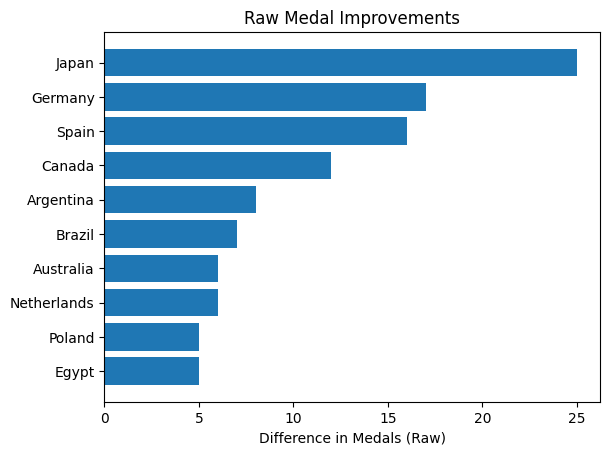

In [113]:
fig, ax = plt.subplots()

ax.barh(most_improved_raw.loc[:9, 'NOC'], most_improved_raw.loc[:9, 'Difference'], align='center')
ax.set_yticks(most_improved_raw.index.values[:10], labels=most_improved_raw.loc[:9, 'NOC'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Difference in Medals (Raw)')
ax.set_title('Raw Medal Improvements')

plt.show()

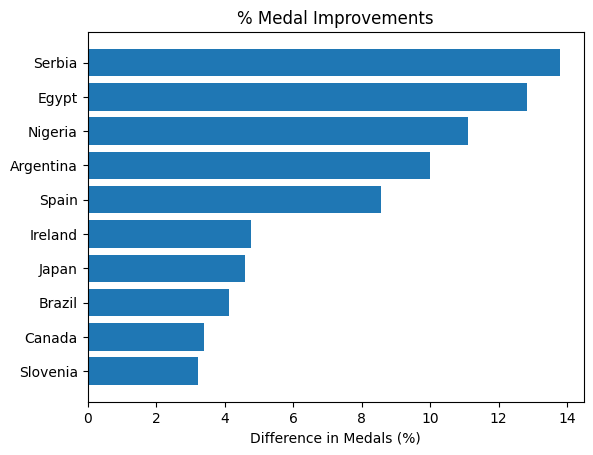

In [115]:
fig, ax = plt.subplots()

ax.barh(most_improved_pct.loc[:9, 'NOC'], most_improved_pct.loc[:9, '% Difference'] * 100, align='center')
ax.set_yticks(most_improved_pct.index.values[:10], labels=most_improved_pct.loc[:9, 'NOC'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Difference in Medals (%)')
ax.set_title('% Medal Improvements')

plt.show()